In [2]:
!pip install tensorflow matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications.vgg16 import preprocess_input

In [3]:
# Завантаження даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізація
x_train = x_train / 255.0
x_test = x_test / 255.0

# Додавання каналу (бо CNN очікує 3D вхід)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encoding міток
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
model = models.Sequential()

# Перший згортковий шар
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Другий згортковий шар
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Третій згортковий шар
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Переходи до повнозв’язного шару
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))  # для зменшення переобучення
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train_cat, epochs=10,
                    validation_split=0.1, batch_size=64, verbose=2)

Epoch 1/10
844/844 - 13s - 16ms/step - accuracy: 0.7889 - loss: 0.5768 - val_accuracy: 0.8653 - val_loss: 0.3711
Epoch 2/10
844/844 - 3s - 4ms/step - accuracy: 0.8711 - loss: 0.3607 - val_accuracy: 0.8813 - val_loss: 0.3066
Epoch 3/10
844/844 - 4s - 4ms/step - accuracy: 0.8893 - loss: 0.3049 - val_accuracy: 0.8942 - val_loss: 0.2817
Epoch 4/10
844/844 - 5s - 6ms/step - accuracy: 0.9001 - loss: 0.2732 - val_accuracy: 0.8980 - val_loss: 0.2800
Epoch 5/10
844/844 - 5s - 6ms/step - accuracy: 0.9083 - loss: 0.2524 - val_accuracy: 0.8977 - val_loss: 0.2748
Epoch 6/10
844/844 - 4s - 5ms/step - accuracy: 0.9167 - loss: 0.2279 - val_accuracy: 0.9057 - val_loss: 0.2496
Epoch 7/10
844/844 - 4s - 5ms/step - accuracy: 0.9212 - loss: 0.2104 - val_accuracy: 0.9065 - val_loss: 0.2557
Epoch 8/10
844/844 - 3s - 4ms/step - accuracy: 0.9275 - loss: 0.1959 - val_accuracy: 0.9100 - val_loss: 0.2483
Epoch 9/10
844/844 - 6s - 7ms/step - accuracy: 0.9319 - loss: 0.1807 - val_accuracy: 0.9140 - val_loss: 0.2473

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Точність на тестовому наборі: {test_acc:.4f}")

Точність на тестовому наборі: 0.9116


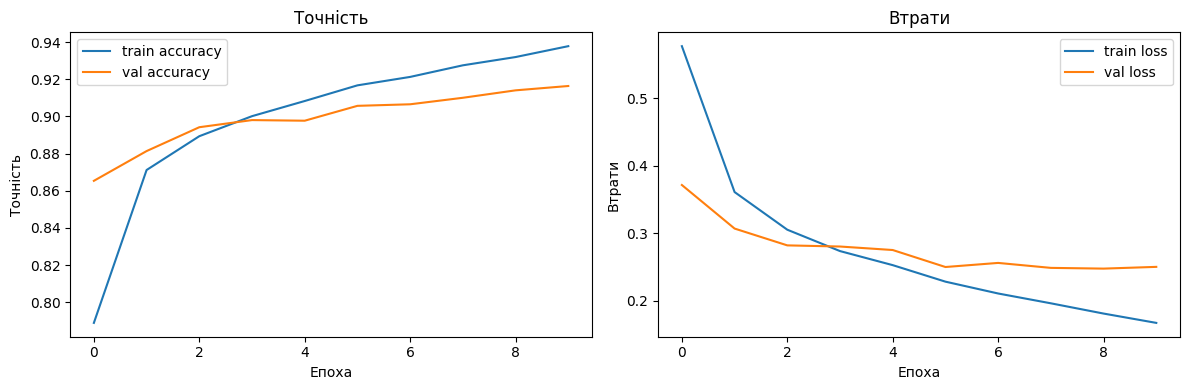

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Точність')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Втрати')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


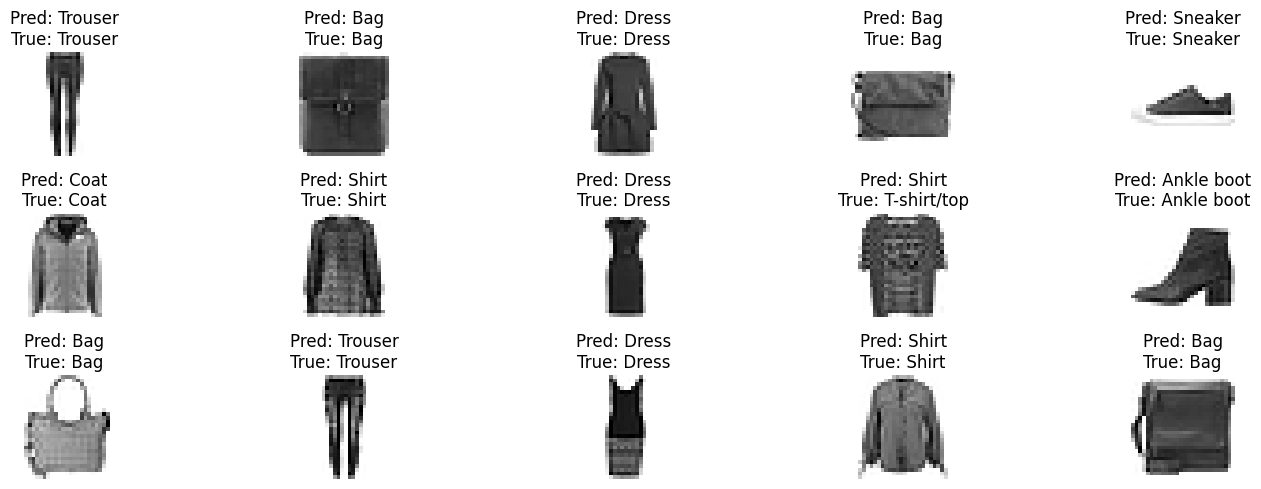

Кількість коректно розпізнаних зображень: 14/15
Процент правильних прогнозів: 93.33%


In [9]:
# Випадкові індекси для тестових зображень
n_test = 15
random_indices = np.random.choice(len(x_test), n_test, replace=False)

# Передбачення для вибраних зображень
predictions = model.predict(x_test[random_indices])

# Назви класів для Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Змінна для підрахунку правильних прогнозів
correct_predictions = 0

# Виведення кожного зображення окремо
n_lines = n_test // 5 + (1 if n_test % 5 != 0 else 0);
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    true_label = y_test[idx]  # Правильна відповідь
    predicted_label = np.argmax(predictions[i])  # Прогноз моделі

    # Якщо прогноз правильний, збільшуємо лічильник правильних прогнозів
    if true_label == predicted_label:
        correct_predictions += 1

    # Виведення зображення з прогнозом та реальним класом
    plt.subplot(n_lines, 5, i + 1)
    plt.imshow(x_test[idx], cmap=plt.cm.binary)
    plt.title(f"Pred: {class_names[predicted_label]}\nTrue: {class_names[true_label]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# Обчислюємо відсоток правильних прогнозів
accuracy = (correct_predictions / n_test) * 100
print(f"Кількість коректно розпізнаних зображень: {correct_predictions}/{n_test}")
print(f"Процент правильних прогнозів: {accuracy:.2f}%")

In [10]:
from skimage.transform import resize
# Завантаження
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормалізація та розширення до 3 каналів
x_train = np.stack([x_train] * 3, axis=-1) / 255.0
x_test = np.stack([x_test] * 3, axis=-1) / 255.0

# Масштабування зображень (для VGG16)
x_train = np.array([resize(img, (32, 32)) for img in x_train])
x_test = np.array([resize(img, (32, 32)) for img in x_test])

# one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (60000, 10)
y_test shape: (10000, 10)


In [11]:
image_input = tf.keras.layers.Input(shape=(32,32, 3))
baseModel_VGG_16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_tensor=image_input)

for layer in baseModel_VGG_16.layers:
    layer.trainable = False

baseModel_VGG_16.summary()

for layer in baseModel_VGG_16.layers:
    layer.trainable = True

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization

model_final = Sequential([
    baseModel_VGG_16,
    Flatten(),
    Dense(units=1000, activation='relu'),
    Dense(units=800, activation='relu'),
    Dense(units=400, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=10, activation='softmax')
])

model_final.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │       513,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 800)            │       800,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 400)            │       320,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,450,198 (62.75 MB)

 Trainable params: 16,450,198 (62.75 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.optimizers import Adam

base_learning_rate = 0.0001
optimizer = Adam(learning_rate=base_learning_rate, clipvalue=1.0)
model_final.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model_final.fit(np.asarray(x_train),
                          np.asarray(y_train),
                          validation_split=0.1,
                          epochs=5,
                          batch_size=32)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_46']
Received: inputs=Tensor(shape=(None, 32, 32, 3))
  warnings.warn(msg)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 102s 52ms/step - accuracy: 0.7966 - loss: 0.5760 - val_accuracy: 0.9000 - val_loss: 0.2815
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 120s 44ms/step - accuracy: 0.9108 - loss: 0.2602 - val_accuracy: 0.9155 - val_loss: 0.2404
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9248 - loss: 0.2138 - val_accuracy: 0.9178 - val_loss: 0.2358
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 74s 44ms/step - accuracy: 0.9342 - loss: 0.1848 - val_accuracy: 0.9355 - val_loss: 0.1876
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9463 - loss: 0.1569 - val_accuracy: 0.9367 - val_loss: 0.1871


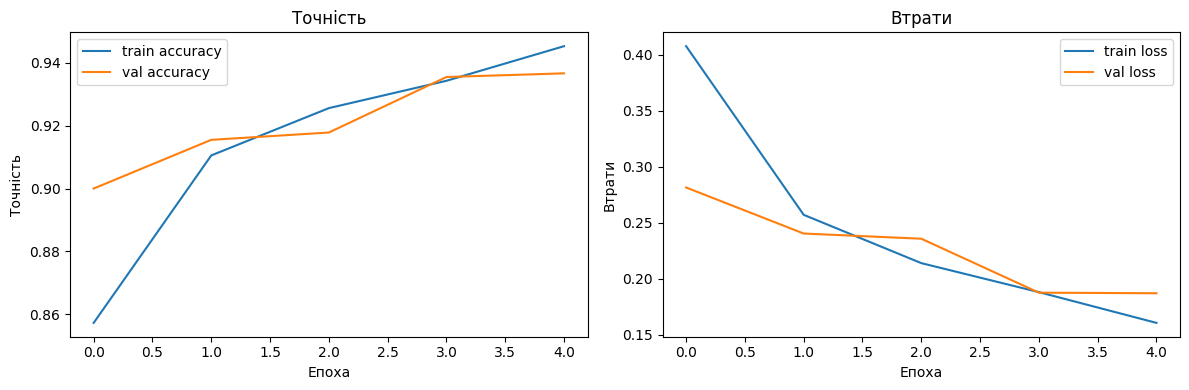

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Точність')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Втрати')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

plt.tight_layout()
plt.show()

Висновки:
VGG16 - складніша модель, дає хороші результати, але навчання займає багато часу, і вона може бути перевантаженою для простих задач.
Згорткова модель - швидше навчається і дає схожі результати, але з меншою складністю.
Вона може бути хорошим варіантом для задач, де важлива швидкість і ефективність, але при цьому не дуже важлива точність.